In [3]:
import sys
import os
sys.path.insert(0, '../../')
import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

analyzer = plots.DataAnalyser()

In [4]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 13})
path = 'dataset_metadata_candidate.csv'
df_total = pd.read_csv(path, sep=',')


In [5]:
# Failed simulations - MPC
df_total.groupby('mpc_success').count()

,sim_id,trajectory_id,trajectory_type,disturbed_inputs,simulation_time (s),time_sample (s),N,M,num_iterations,mpc_RMSe,...,period (s),inter_position_RMSe,RMSe_u0,RMSe_u1,RMSe_u2,RMSe_u3,RMSe_u4,RMSe_u5,RMSe_u6,RMSe_u7
mpc_success,,,,,,,,,,,,,,,,,,,,,
False,9,9,9,9,9,9,9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
True,19,19,19,19,19,19,19,19,19,19,...,0,16,16,16,16,16,16,16,16,16


In [6]:
# Failed simulations - NN
df_total.groupby('nn_success').count()

,sim_id,trajectory_id,trajectory_type,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,...,period (s),inter_position_RMSe,RMSe_u0,RMSe_u1,RMSe_u2,RMSe_u3,RMSe_u4,RMSe_u5,RMSe_u6,RMSe_u7
nn_success,,,,,,,,,,,,,,,,,,,,,
False,12,12,12,12,12,12,12,12,12,3,...,0,0,0,0,0,0,0,0,0,0
True,16,16,16,16,16,16,16,16,16,16,...,0,16,16,16,16,16,16,16,16,16


In [7]:
nn_success_df = df_total[df_total['nn_success'] == True]
nn_success_df['failed_rotors'] = nn_success_df['failed_rotors'].apply(lambda x: np.array([int(s) for s in x.split('-')]))

nn_failed_df = df_total[df_total['nn_success'] == False]
nn_failed_df['failed_rotors'] = nn_failed_df['failed_rotors'].apply(lambda x: [int(s) for s in x.split('-')])

mpc_success_df = df_total[df_total['mpc_success'] == True]
mpc_success_df['failed_rotors'] = mpc_success_df['failed_rotors'].apply(lambda x: np.array([int(s) for s in x.split('-')]))

mpc_failed_df = df_total[df_total['mpc_success'] == False]
mpc_failed_df['failed_rotors'] = mpc_failed_df['failed_rotors'].apply(lambda x: [int(s) for s in x.split('-')])

#mpc_success = np.concatenate(mpc_success_df['failed_rotors'].to_numpy(), axis = 0)
mpc_success = np.vstack(mpc_success_df['failed_rotors'])
mpc_failed = np.vstack(mpc_failed_df['failed_rotors'])

nn_success = np.vstack(nn_success_df['failed_rotors'])
nn_failed = np.vstack(nn_failed_df['failed_rotors'])

plots = [
    [mpc_success, mpc_failed],
    [nn_success, nn_failed]
]


C:\Users\mathe\AppData\Local\Temp\ipykernel_69316\3401443032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_success_df['failed_rotors'] = nn_success_df['failed_rotors'].apply(lambda x: np.array([int(s) for s in x.split('-')]))
C:\Users\mathe\AppData\Local\Temp\ipykernel_69316\3401443032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_failed_df['failed_rotors'] = nn_failed_df['failed_rotors'].apply(lambda x: [int(s) for s in x.split('-')])
C:\Users\mathe\AppData\Local\Temp\ipykernel_69316\3401

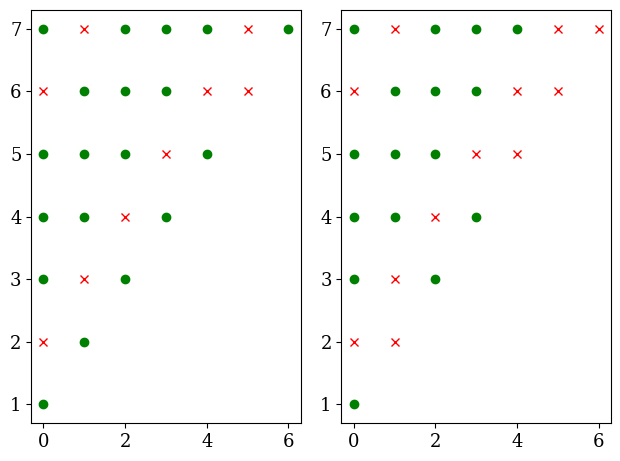

In [8]:
fig, axs = plt.subplots(1,2)
for i, ax in enumerate(axs.flatten()):
    plot = plots[i]
    ax.plot(plot[0][:,0], plot[0][:,1], 'og') # Success
    ax.plot(plot[1][:,0], plot[1][:,1], 'xr') # Failed
fig.tight_layout()


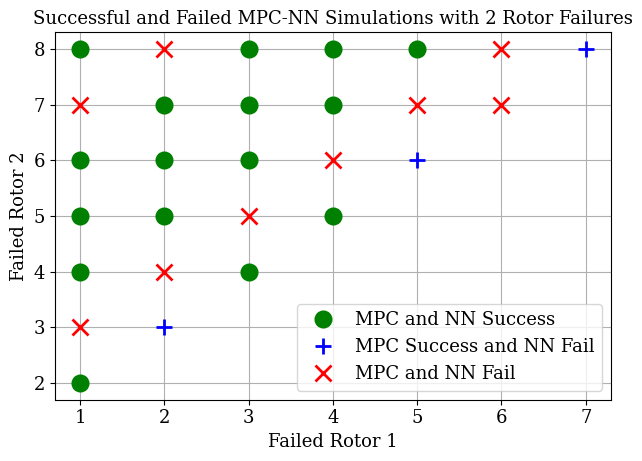

In [9]:
plot = []

for rotor_combination_mpc in mpc_success:
    both_success = False
    for rotor_combination_nn in nn_success:
        if rotor_combination_mpc[0] in rotor_combination_nn and rotor_combination_mpc[1] in rotor_combination_nn:
            both_success = True
            plot.append([rotor_combination_mpc[0], rotor_combination_mpc[1], 'o', 'green', 'MPC and NN Success'])
    if not both_success: # MPC success and NN fail
        plot.append([rotor_combination_mpc[0], rotor_combination_mpc[1], '+', 'blue', 'MPC Success and NN Fail'])

for rotor_combination_mpc in mpc_failed:
    both_failed = False
    for rotor_combination_nn in nn_failed:
        if rotor_combination_mpc[0] in rotor_combination_nn and rotor_combination_mpc[1] in rotor_combination_nn:
            both_failed = True
            plot.append([rotor_combination_mpc[0], rotor_combination_mpc[1], 'x', 'red', 'MPC and NN Fail'])
    if not both_failed: # MPC fail and NN success
        plot.append([rotor_combination_mpc[0], rotor_combination_mpc[1], '1', 'blue', 'MPC Fail and NN Success'])

labels = []
fig= plt.figure()
for i, p in enumerate(plot):
    if p[4] in labels:
        plt.plot(p[0]+1, p[1]+1, marker=p[2], color=p[3], markersize=11,linewidth=2, linestyle='None', markeredgewidth=2)
    else:
        plt.plot(p[0]+1, p[1]+1, marker=p[2], color=p[3], label=p[4], markersize=11,linewidth=2, linestyle='None',markeredgewidth=2)
        labels.append(p[4])
    plt.legend()
    plt.title('Successful and Failed MPC-NN Simulations with 2 Rotor Failures', fontsize=13)
    plt.xlabel('Failed Rotor 1')
    plt.ylabel('Failed Rotor 2')
    plt.grid(True)
    plt.tight_layout()
    fig.savefig('2rotor-distribution.pdf')
    #else:
    #    handles.append(plt.plot(p[0], p[1], marker=p[2], color=p[3],markersize=10,linewidth=2))



percentile 1 (0.9) = 18.448075526553808
percentile 2 (0.9) = 4.561387231960826


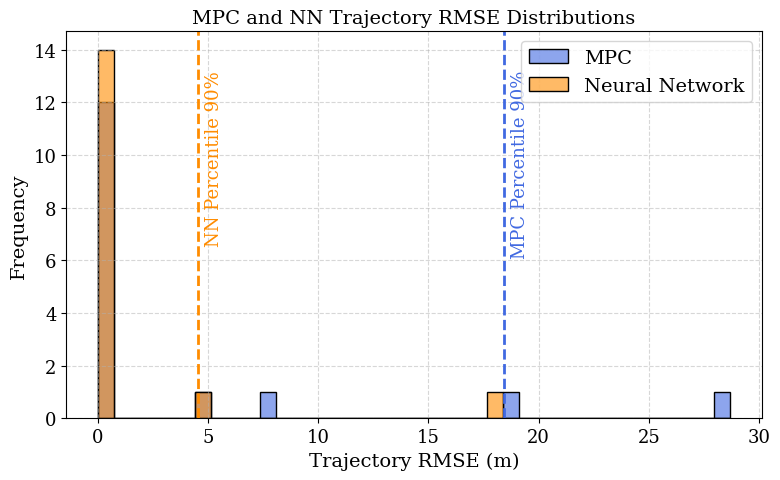

In [10]:
df_both_success = df_total[(df_total['nn_success'] == True) & (df_total['mpc_success'] == True)]
len(df_both_success)

analyzer.plot_histogram(df_both_success, 'mpc_RMSe', 'nn_RMSe', 'Trajectory RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='2rotorsfail_rmse.pdf', percentile_1=0.90, percentile_2=0.90, show_mean=False, num_bins=40, stat='count')


In [11]:
stats_rmse = analyzer.stats_simulations(df_both_success, 'mpc_RMSe', 'nn_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.010426,28.674508,3.772980,8.225985
1,Neural Network,0.025549,18.257212,1.520366,4.601036
